In [3]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

# <font size="5" color="red"><b>ch2. 군집분석</b></font>


# 1절. 군집모델(클러스터링)
-클러스터(cluster) : 독립변수의특성이유사한데이터의그룹
-클러스터링(clustering) : 주어진데이터를여러개의클러스터로구분하는것
1) 중심기반클러스터링(K-Means) : https://commons.wikimedia.org/wiki/File:KMeans-Gaussian-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e5/KMeans-Gaussian-data.svg"
style="display: block; margin-left: 0; width: 20%;">
2) 연결기반클러스터링(DBSCAN) : https://commons.wikimedia.org/wiki/File:DBSCAN-density-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/0/05/DBSCAN-density-data.svg"
width="300"
style="display: block; margin-left: 0; width: 20%;">
3) 밀도기반클러스터링(DBSCAN의변형으로OPTICS) : https://commons.wikimedia.org/wiki/File:OPTICS-Gaussian-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/OPTICS-Gaussian-data.svg"
width="300"
style="display: block; margin-left: 0; width: 20%;">

# 2절 K-Means 클러스터링
- 가장 단순하고 빠른 클러스터링 알고리즘
- 중심점을 찾아가는 알고리즘
- 세부 알고리즘 (교안 6page)
    1. 임의의 중심값μk를 고릅니다.(보통 데이터샘플중의 하나를 선택합니다.)
    2. 중심에서 각 샘플데이터까지의 거리를 계산합니다.
    3. 각 데이터샘플에서 가장 가까운 중심을 선택하여 클러스터갱신합니다.
    4. 다시 만들어진 클러스터에 대해 중심을 다시 계산하고 1~4를 반복합니다

In [10]:
# 분류를 위한 가상의 데이터 생성
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=20, # 데이터 갯수 n_samples=20
                         n_features=2,  # 독립변수 개수(기본값20)
                         n_informative=2, # 타겟변수에 영향을 미치는 독립변수 갯수
                         n_redundant=0,   # 타겟변수에 영향을 미치지않는 독립변수 갯수
                         n_clusters_per_class=1, # 각 타겟변수 그룹별 서브그룹이 없음
                         n_classes=2,     # 타겟변수의 그룹수
                         random_state=123) 
import numpy as np
print(X.shape,y.shape)
np.c_[X,y][:3]

(20, 2) (20,)


array([[ 1.03859554,  2.51175389,  0.        ],
       [ 1.00271366,  1.93521549,  0.        ],
       [-1.6881048 ,  0.02599427,  1.        ]])

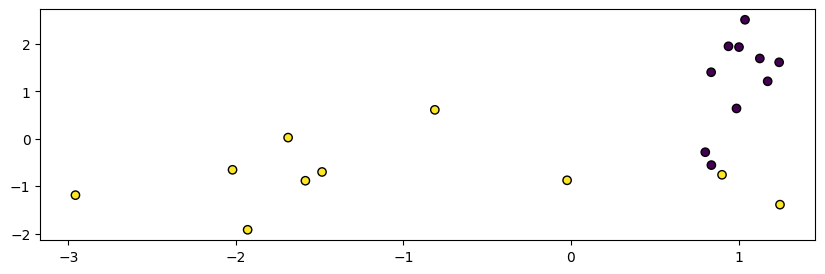

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x = X[:,0],y=X[:,1],c=y, edgecolors='k') # c=[0]*20 
plt.show()

In [18]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2,      # 군의 갯수
              init='k-means++',   # 초기 중심점을 서로 멀리 초기화 . random(초기중심랜덤)
              n_init=10,          # 각 다른 초기값으로 10번 실행해보고 가장 좋은 모델 선택
              max_iter=300)       # 각 실행에서 300번 미만으로 중심점을 옮김
model.fit(X)          

KMeans(n_clusters=2, n_init=10)

In [26]:
centers = model.cluster_centers_   # 각 그룹의 중심점
print('model.labels :   ',model.labels_)
pred = model.predict(X)
print('    예측값     : ',pred)
print('    실제값     : ',y)

model.labels :    [1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1]
    예측값     :  [1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1]
    실제값     :  [0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0]


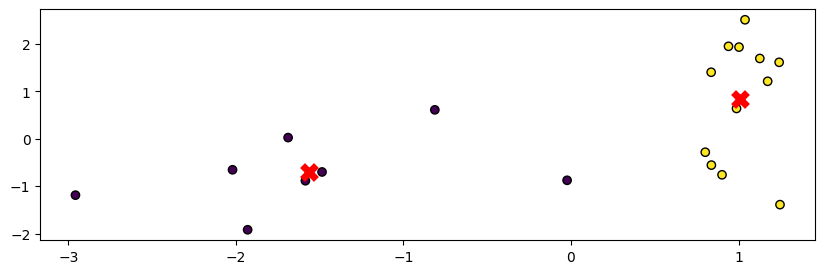

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x = X[:,0],y=X[:,1],c=pred, edgecolors='k') # c=[0]*20 
plt.scatter(x = centers[:,0],y=centers[:,1],c='r',marker='x',s=100,lw=5)
plt.show()

## cf. Normalizer(스케일러) 적용

In [31]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
Xnor = scaler.fit_transform(X)
np.c_[X,Xnor][:3]

array([[ 1.03859554,  2.51175389,  0.3821159 ,  0.92411441],
       [ 1.00271366,  1.93521549,  0.46005267,  0.88789162],
       [-1.6881048 ,  0.02599427, -0.99988146,  0.01539667]])

In [32]:
model = KMeans(n_clusters=2,
              init='random',
              n_init='auto',    # init가 k-means++이면 1, init가 random이면 10
              max_iter=300)
model.fit(Xnor)

KMeans(init='random', n_clusters=2, n_init='auto')

In [37]:
# 0 그룹으로 분류된 Xnor
Xnor[model.labels_==0,0]    # x축
Xnor[model.labels_==0,1]    # y축

array([0.3821159 , 0.46005267, 0.76493676, 0.51161542, 0.83395074,
       0.55350265, 0.94318094, 0.43387458, 0.60980605, 0.66821427,
       0.83902767, 0.69516439])

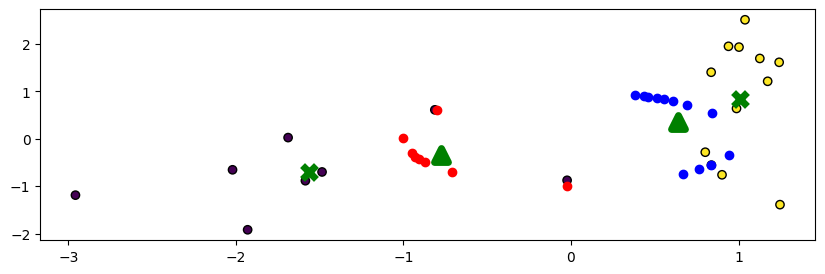

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x = X[:,0],y=X[:,1],c=pred, edgecolors='k') # c=[0]*20 
plt.scatter(x = centers[:,0],y=centers[:,1],c='g',marker='x',s=100,lw=5)
plt.scatter(x = Xnor[model.labels_==0,0],
            y = Xnor[model.labels_==0,1],c='b')
plt.scatter(x = Xnor[model.labels_==1,0],
            y = Xnor[model.labels_==1,1],c='r')
plt.scatter(x = model.cluster_centers_[:,0],
            y = model.cluster_centers_[:,1],c='g',marker='^',s=100,lw=5)
plt.show()

In [41]:
model.cluster_centers_

array([[ 0.64128684,  0.34902823],
       [-0.77398837, -0.33522479]])

## K-Means 클러스터링의 한계점(13p)

- 군의 특성이 다를 경우
    * 군의 크기가 다른 경우
    * 군의 밀도가 다른 경우
    * 군이 비구형일 경우
- 이상치를 포함할 경우 : 이상치를 조정하거나 삭제한 후 클러스터링

### - 군의 크기가 다른 경우

In [51]:
np.random.seed(0)
# group0 : 평균 -10, 표준편차2인 10행 2열 배열
group0 = np.random.normal(loc=-10,scale=2,size=(10,2))
y = np.full(len(group0),0)
y
group0 = np.c_[group0,y]
group0[:3]

array([[ -6.47189531,  -9.19968558,   0.        ],
       [ -8.04252403,  -5.5182136 ,   0.        ],
       [ -6.26488402, -11.95455576,   0.        ]])

In [52]:
# group1 : 평균 10, 표준편차2인 10행 2열 배열
group1 = np.random.normal(loc=10,scale=2,size=(10,2))
y = np.full(len(group1),1)
y
group1 = np.c_[group1,y]
group1[:3]

array([[ 4.89402037, 11.30723719,  1.        ],
       [11.7288724 ,  8.51566996,  1.        ],
       [14.53950925,  7.09126865,  1.        ]])

In [58]:
# group2 :평균0, 표준편차5인 100행2열 배열
group2 = np.random.normal(loc=0, scale=5, size=(100,2))
y = np.full(len(group2),2)
group2 = np.c_[group2, y]
group2[:2]

array([[-5.24276483, -7.10008969,  2.        ],
       [-8.53135095,  9.75387698,  2.        ]])

In [59]:
data = np.r_[group0,group1,group2]
data[::10],data.shape

(array([[-6.47189531, -9.19968558,  0.        ],
        [ 4.89402037, 11.30723719,  1.        ],
        [-5.24276483, -7.10008969,  2.        ],
        [-3.36230224, -1.79776581,  2.        ],
        [-5.8257492 ,  4.50413243,  2.        ],
        [ 9.41575349, -6.73879531,  2.        ],
        [ 1.88212766, -5.49700395,  2.        ],
        [-7.45628796,  2.19695851,  2.        ],
        [-2.49016225,  9.64766027,  2.        ],
        [-1.76996956, -6.87475647,  2.        ],
        [-1.84590919, -1.19689589,  2.        ],
        [-4.779725  , -1.72990888,  2.        ]]),
 (120, 3))

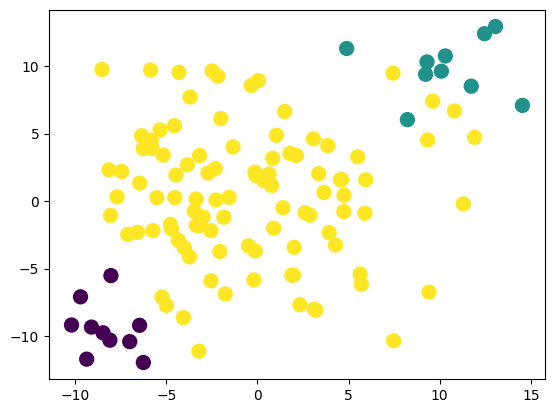

In [60]:
plt.scatter(x=data[:,0],y=data[:,1],c=data[:,2],s=100)

In [65]:
model = KMeans(n_clusters=3, init='k-means++', n_init='auto')
model.fit(data[:, :2])

KMeans(n_clusters=3, n_init='auto')

In [66]:
center = model.cluster_centers_ #중심점
center

array([[-3.23795138,  3.79797742],
       [ 7.93234415,  5.526175  ],
       [-2.11638402, -5.40013046]])

In [67]:
pred = model.predict(data[:,:2])
print(pred)
pred = model.labels_ # 모델이 클러스터링한 결과
print(pred)

[2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 2 0 0 2 2 2 2 0 0 1 2
 2 2 0 0 2 1 1 0 0 0 0 0 0 2 0 0 2 1 1 0 0 1 1 2 0 0 0 1 0 0 0 2 2 0 0 1 0
 2 0 2 2 2 2 0 1 0 2 1 1 2 0 2 0 2 2 2 0 0 0 2 2 1 1 2 1 2 2 2 1 2 2 0 1 2
 0 0 0 2 2 0 0 2 0]
[2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 2 0 0 2 2 2 2 0 0 1 2
 2 2 0 0 2 1 1 0 0 0 0 0 0 2 0 0 2 1 1 0 0 1 1 2 0 0 0 1 0 0 0 2 2 0 0 1 0
 2 0 2 2 2 2 0 1 0 2 1 1 2 0 2 0 2 2 2 0 0 0 2 2 1 1 2 1 2 2 2 1 2 2 0 1 2
 0 0 0 2 2 0 0 2 0]


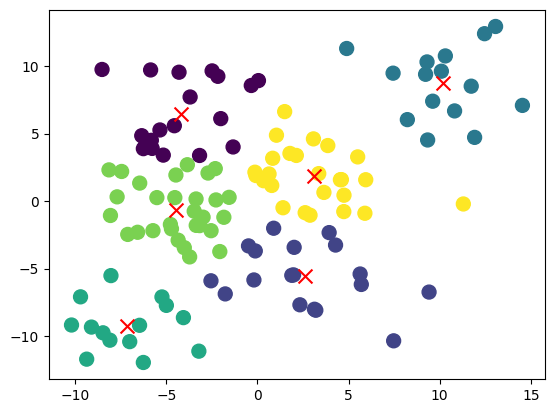

In [79]:
plt.scatter(x=data[:,0],y=data[:,1],c=pred,s=100)
plt.scatter(x=centers[:,0],y=centers[:,1],c='r',s=100,marker='x')

In [72]:
# 위의 단점을 보완하고자 6개 그룹으로 clustering
model = KMeans(n_clusters=6,n_init=10)
model.fit(data[:,:2])

KMeans(n_clusters=6, n_init=10)

In [74]:
centers = model.cluster_centers_
pred = model.labels_
pred

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0,
       4, 0, 4, 4, 1, 5, 5, 4, 4, 3, 1, 4, 4, 5, 1, 1, 4, 4, 0, 1, 2, 5,
       0, 0, 5, 5, 0, 5, 1, 0, 0, 4, 2, 2, 0, 0, 5, 5, 1, 5, 4, 0, 5, 4,
       4, 0, 5, 1, 4, 5, 2, 0, 4, 0, 4, 1, 1, 4, 0, 5, 0, 3, 5, 5, 1, 0,
       4, 4, 1, 3, 1, 4, 0, 4, 1, 5, 5, 2, 4, 5, 1, 1, 5, 5, 1, 4, 5, 5,
       4, 4, 4, 5, 4, 4, 4, 0, 1, 5])

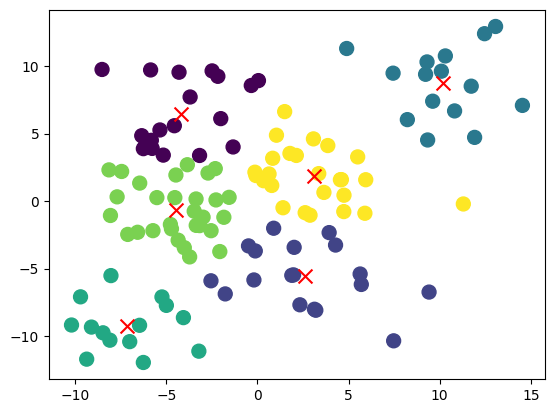

In [77]:
plt.scatter(x=data[:,0],y=data[:,1],c=pred,s=100)
plt.scatter(x=centers[:,0],y=centers[:,1],c='r',s=100,marker='x')

In [85]:
data[pred==0,0] # 0번 그룹의 x축 데이터

array([-8.53135095, -6.2639768 , -5.8257492 , -5.35376311, -2.01588473,
        0.0525001 , -6.35242499, -5.86561703, -4.30612843, -1.34001685,
       -2.17576776, -3.17923039, -4.56411113, -0.34120803, -2.49016225,
       -6.12717759, -5.17121421, -3.69781498, -5.78091216])

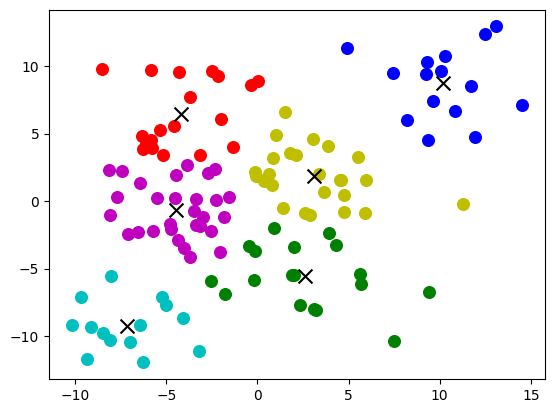

In [87]:
colors = ['r','g','b','c','m','y'] # 0,1,4,5/ 2 / 3

for i in range(len(colors)):
    plt.scatter(x = data[pred==i,0],
                y = data[pred==i,1],c=colors[i],s=70 )
plt.scatter(x=centers[:,0],y=centers[:,1],c='k',s=100,marker='x')

### - 밀도가 다를 경우

In [88]:
# 직접 해볼것

# 3절 Hierarchical 클러스터링(계층적 군집 분석)

- 계층적 분석(linkage) -> dendrogram -> fcluster를 이용해서 클러스터를 생성
    * 군끼리 묶으면서 하나의 군집이 될 때까지 군을 묶는 클러스터링 알고리즘
    * 군집의 수를 미리 정해주지 않아도 됨
    * Dendrogram을 이용하여 다양한 군집 수 시각화

In [94]:
from seaborn import load_dataset
iris = load_dataset('iris')
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
109,7.2,3.6,6.1,2.5,virginica
42,4.4,3.2,1.3,0.2,setosa
35,5.0,3.2,1.2,0.2,setosa
131,7.9,3.8,6.4,2.0,virginica
83,6.0,2.7,5.1,1.6,versicolor
49,5.0,3.3,1.4,0.2,setosa
89,5.5,2.5,4.0,1.3,versicolor
41,4.5,2.3,1.3,0.3,setosa
37,4.9,3.6,1.4,0.1,setosa
5,5.4,3.9,1.7,0.4,setosa


In [95]:
# 계층적 군집 결과와 맞추기 위한 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['species'] = le.fit_transform(iris.species)
iris.loc[::50]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1
100,6.3,3.3,6.0,2.5,2


In [97]:
from scipy.cluster.hierarchy import linkage
# method="single"    : 가장 가까운 거리를 사용 (기본값)
# method="complete"  : 가장 먼 거리를 사용
cluster_model = linkage(iris, method="complete")
cluster_model.shape

(149, 4)

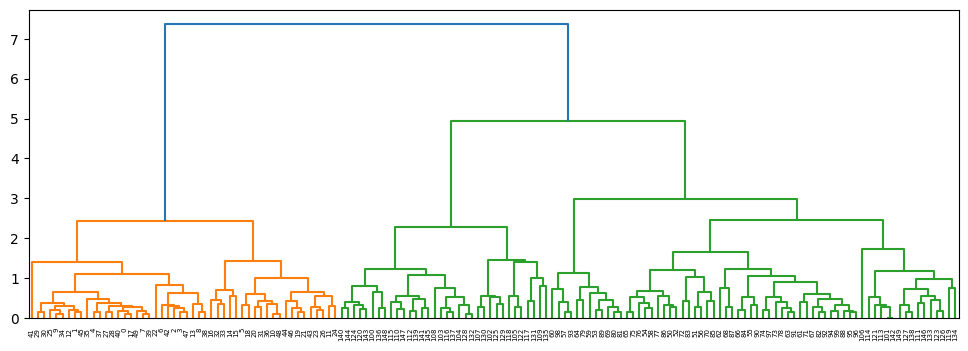

In [103]:
# Dendrogram 
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
dendrogram(cluster_model,labels=iris.index)
# 파일로 저장
plt.savefig('data/ch02_dendrogram.png',dpi=300,bbox_inches='tight')
plt.show()

In [104]:
# 클러스터링
from scipy.cluster.hierarchy import fcluster
fcluster(cluster_model, # linkage()로 만든 클러스터링 결과
        t=4,            # 클러스트를 나누는 임계값(threshold)
        criterion='distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [105]:
pred  = fcluster(cluster_model,4,criterion='distance')
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [106]:
# np.choose
import numpy as np
np.choose([3,3,2,1,2],[0,10,20,30])  # np.choose(인덱스, 값)

array([30, 30, 20, 10, 20])

In [109]:
# pred에서 1은 0, 3은 1로 2는 2로 변경
adjusted_pred = np.choose(pred,[999,0,2,1])  # 조정된 예측치(실제값 : iris.species)
import pandas as pd
pd.crosstab(iris.species,adjusted_pred,rownames=['실제'],colnames=['예측'],
           margins=True) # 행과 열의 총계 추가

예측,0,1,2,All
실제,,,,
0,50,0,0,50
1,0,50,0,50
2,0,16,34,50
All,50,66,34,150


In [111]:
original_name = le.inverse_transform(iris.species)
pred_name    = le.inverse_transform(adjusted_pred)
pd.crosstab(original_name,pred_name)

col_0,setosa,versicolor,virginica
row_0,,,
setosa,50,0,0
versicolor,0,50,0
virginica,0,16,34


<Axes: xlabel='petal_length', ylabel='petal_width'>

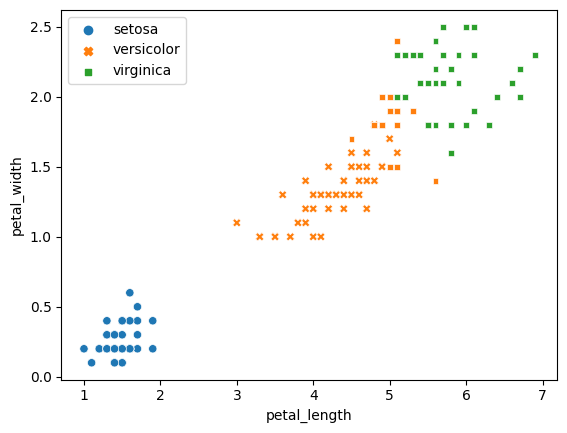

In [115]:
import seaborn as sns
sns.scatterplot(data=iris,
               x='petal_length',y='petal_width',
               hue=pred_name,
               style=original_name)

# 4절 DBSCAN 클러스터링

- 연결 기반(밀도 기반) 군집합 알고리즘. 이상치를 자동 감지
- 단점 : 클러스터의 밀도가 일정하지 않으면 성능이 낮아짐

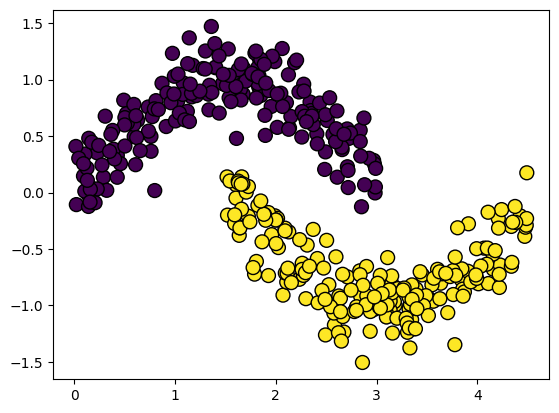

In [145]:
X1 = np.random.rand(200)*3   # 0 <= rand(데이터갯수)*3 < 1. 균등분포
noise = np.random.normal(0,0.2,X1.shape)
Y1 = np.sin(X1) + noise
#plt.scatter(x=X1,y=Y1)
group1 = np.c_[X1,Y1,np.full(len(X1),0)]
#print(group1[:3])

X2 = X1 + 1.5
noise = np.random.normal(0,0.2,X1.shape)
Y2 = np.cos(X2) + noise
#plt.scatter(X2,Y2)
group2 = np.c_[X2,Y2,np.full(len(X2),1)]
#print(group2[:3])
data = np.r_[group1,group2]
# data[::40]
plt.scatter(x=data[:,0],
            y=data[:,1],c=data[:,2],s=100,edgecolors='k')
plt.show()

In [146]:
# KMeans : 거리 기반 클러스터링
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2,init='random',n_init=10)
model.fit(data[:,:2])
pred = model.predict(data[:,:2])
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,

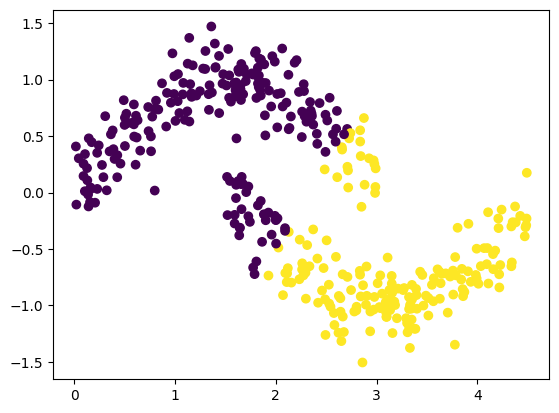

In [147]:
plt.scatter(x=data[:,0],y=data[:,1],c=pred)

## 밀도 기반 DBSCAN

In [148]:
from sklearn.cluster import DBSCAN
# 반경(epsilon)이 0.3 이내의 최소 10개 데이터씩 군집화
db_model = DBSCAN(eps=0.3,min_samples=10)
db_model.fit(data[:,:2])

DBSCAN(eps=0.3, min_samples=10)

In [162]:
label = db_model.labels_  # -1: 이상치 자동 감지
# 1그룹으로 분류된 data
set(label)
n_noise = list(label).count(-1)
n_cluster = len(set(label)) -(1 if -1 in label else 0)
print('이상치 갯수 :', n_noise, ', 예측된 클러스터 갯수 : ',n_cluster)

이상치 갯수 : 1 , 예측된 클러스터 갯수 :  2


In [164]:
# 0으로 분류된 data
data[label==0][:3]

array([[1.47174154, 0.96472234, 0.        ],
       [0.91286294, 0.58455024, 0.        ],
       [0.28971872, 0.1360445 , 0.        ]])

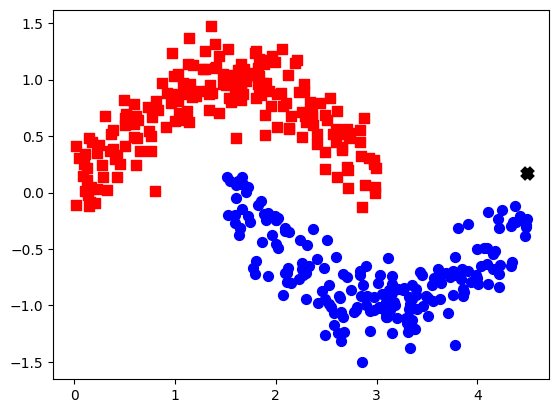

In [166]:
colors = ['r','b']
markers = ['s','o']
for i in range(n_cluster):
    plt.scatter(x=data[label==i,0],
                y=data[label==i,1],s=50,c=colors[i],marker=markers[i])
plt.scatter(x=data[label==-1,0],
            y=data[label==-1,1],s=50,c='k',marker='x',lw=5)

# 5절. 군집 모형의 성능평가

- score 함수를 통해 예측 모형 평가(분류,회귀./ 군집에서는 안씀)
- metrics 모듈의 함수를 통해 군집 모형 평가
- 실루엣 계수(클러스터 소속과 갯수를 모를 때)

## 5.1 metrics 함수 이용

In [167]:
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
12,4.8,3.0,1.4,0.1,0


In [168]:
iris_X = iris.iloc[:,:-1]
iris_y = iris.iloc[:,-1]
iris_X.shape,iris_y.shape

((150, 4), (150,))

### *3개 그룹으로 군집화

In [172]:
# 3개 그룹으로 군집화
iris_model3 = KMeans(n_clusters=3,random_state=1,n_init=10)
iris_model3.fit(iris_X)
pred = iris_model3.labels_
#print(pred)
pred = iris_model3.predict(iris_X)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [176]:
# pred 조정 (1->0, 0->1, 2->2) np.choose(인덱스들,값들)
np.choose([1,1,0,0,2,2],[1,0,2])  # 예졔
pred3 = np.choose(pred,[1,0,2]) # 3개 그룹으로 군집화한 결과
pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [181]:
# 3개 그룹으로 군집화한 자료 
print('실제값 :',iris_y[::50])
print('예측값 : ',pred3[::50])

실제값 : 0      0
50     1
100    2
Name: species, dtype: int32
예측값 :  [0 1 2]


### *2개 그룹으로 군집화

In [183]:
# 2개 그룹으로 군집화
iris_model2 = KMeans(n_clusters=2,n_init=10,random_state=1)
iris_model2.fit(iris_X)
pred2 = iris_model2.labels_
#pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [185]:
# 2개 그룹으로 군집화한 자료
iris_y2 = np.array([0]*50 + [1]*100)
print('실제값 :', iris_y2)
print('예측값 :', pred2)

실제값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
예측값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


### 조정된 rand지수

In [186]:
# 3개 그룹 평가
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(labels_true=iris_y,  # 실제값
                   labels_pred=pred3)    # 예측값

0.7302382722834697

In [187]:
# 2개 그룹 평가
adjusted_rand_score(labels_true=iris_y2,
                   labels_pred=pred2)

0.920405050901892

### 상호의존도를 나타내는 지표
- 두 군집간 정보 공유 정도

In [194]:
species_name = le.inverse_transform(iris_y)                # 실제값 원형
pred_name    = le.inverse_transform(pred3)                 # 예측값(이름)

In [199]:
# 3그룹 평가
from sklearn.metrics import mutual_info_score
print(mutual_info_score(iris.species,pred3))
print(mutual_info_score(species_name,pred_name))
print(mutual_info_score(species_name,pred3))

0.8255910976103356
0.8255910976103356
0.8255910976103356


In [200]:
# 2그룹 평가
mutual_info_score(iris_y2,pred2)

0.5596576064224734

### 그 외 클러스터링 성능평가 기준들

In [201]:
from sklearn.metrics import homogeneity_score
print('3그룹 :',homogeneity_score(iris.species,pred3))
print('3그룹 :',homogeneity_score(species_name,pred_name))
print('2그룹 :',homogeneity_score(iris_y2,pred2))

3그룹 : 0.7514854021988338
3그룹 : 0.7514854021988338
2그룹 : 0.8792539652679946


In [202]:
from sklearn.metrics import completeness_score
print('3그룹 :',completeness_score(iris.species,pred3))
print('3그룹 :',completeness_score(species_name,pred_name))
print('2그룹 :',completeness_score(iris_y2,pred2))


3그룹 : 0.7649861514489815
3그룹 : 0.7649861514489815
2그룹 : 0.861693475999054


In [203]:
# homogeneity_score와  completeness_score의 조화평균
from sklearn.metrics import v_measure_score
print('3그룹 :',v_measure_score(iris.species,pred3))
print('3그룹 :',v_measure_score(species_name,pred_name))
print('2그룹 :',v_measure_score(iris_y2,pred2))

3그룹 : 0.7581756800057784
3그룹 : 0.7581756800057784
2그룹 : 0.870385156563164


## 5.2 실루엣 계수

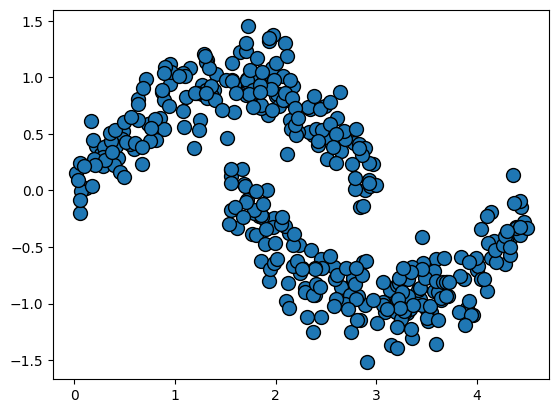

In [210]:
np.random.seed(0)
X1 = np.random.rand(200)*3   # 0 <= rand(데이터갯수)*3 < 1. 균등분포
noise = np.random.normal(0,0.2,X1.shape)
Y1 = np.sin(X1) + noise
#plt.scatter(x=X1,y=Y1)
group1 = np.c_[X1,Y1,np.full(len(X1),0)]
#print(group1[:3])

X2 = X1 + 1.5
noise = np.random.normal(0,0.2,X1.shape)
Y2 = np.cos(X2) + noise
#plt.scatter(X2,Y2)
group2 = np.c_[X2,Y2,np.full(len(X2),1)]
#print(group2[:3])
data = np.r_[group1,group2]
# data[::40]
plt.scatter(x=data[:,0],
            y=data[:,1],s=100,edgecolors='k')
plt.show()

In [219]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_cluster in range_n_clusters:
    model = KMeans(n_clusters=n_cluster,
                  n_init=10,
                  random_state=0)
    model.fit(data[:,:-1])
    score = silhouette_score(X=data[:,:-1],labels=model.labels_)
    print("클러스터 수 :{}, 실루엣 계수 : {} ".format(n_cluster,score))
    #print(model.labels_)
# 실루엣 계수가 가장 높은 7개로 클러스터링을 할 예정


클러스터 수 :2, 실루엣 계수 : 0.5319154905481303 
클러스터 수 :3, 실루엣 계수 : 0.4675310928682518 
클러스터 수 :4, 실루엣 계수 : 0.47531670307119467 
클러스터 수 :5, 실루엣 계수 : 0.49065908101876077 
클러스터 수 :6, 실루엣 계수 : 0.4846410902943432 
클러스터 수 :7, 실루엣 계수 : 0.5079889111161713 
클러스터 수 :8, 실루엣 계수 : 0.4959234083493174 
클러스터 수 :9, 실루엣 계수 : 0.4720840530079055 
클러스터 수 :10, 실루엣 계수 : 0.4460355216087853 


In [220]:
model = KMeans(n_clusters=7, init='random',n_init=10)
model.fit(data[:,:-1])
pred = model.labels_
pred = model.predict(data[:,:-1])

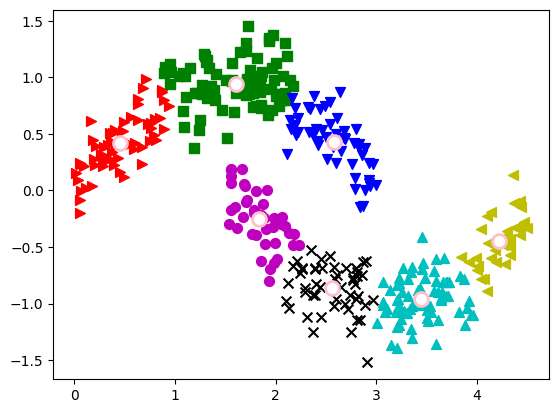

In [221]:
centers = model.cluster_centers_
colors =['r','g','b','c','m','y','k']     # 0,1,2 => 0 / 3,4,5,6 =>1
markers = ['>','s','v','^','o','<','x']
# 0 클러스터로 분류된 데이터
#data[pred==6]
for i, c in enumerate(centers):
    #print(i,c)
    plt.scatter(x=data[pred==i,0],
                y=data[pred==i,1], s=50,c=colors[i],marker=markers[i])
    plt.scatter(c[0],c[1], # x=c[0],y=c[1] 동일
               s=100,c='w',edgecolors='pink',lw=2)

# 6절. 연습문제
```
iris 데이터의petal_length열과petal_width열을이용해서K-Means 알고리즘으로군집분석하고그래프로시각화하세요
 (단, 각클러스터의중심점이함께표시되고군의수는2로설정)
```
